# Applied Data Science with Python: 
# Incremental Capstone 1 Session 3

### Project Statement: Develop a comprehensive solution for data aggregation, wrangling, and visualization using a healthcare dataset for the Aura platform. The goal is to effectively manage and process complex healthcare data to enable insightful analysis and enhance data-driven decision-making capabilities within Aura.


### Variable Descriptions

| **Variable**   | **Description**                                                                 | **Type** |
|----------------|---------------------------------------------------------------------------------|---------------|
| `visits`       | Number of physician office visits                                               | numeric         |
| `nvisits`      | Number of non-physician office visits                                           | numeric         |
| `ovisits`      | Number of physician hospital outpatient visits                                  | numeric         |
| `novisits`     | Number of non-physician hospital outpatient visits                              | numeric         |
| `emergency`    | Emergency room visits                                                           | numeric         |
| `health`       | Factor indicating self-perceived health                                         | categorical        |
| `chronic`      | Number of chronic conditions                                                    | numeric         |
| `adl`          | Factor indicating whether the individual has a condition that limits activities of daily living | categorical        |
| `region`       | Factor indicating region                                                        | categorical        |
| `age`          | Age in years (divided by 10)                                                    | numeric       |
| `hospital`     | Number of hospital stays                                                        | numeric         |
| `gender`       | Factor indicating gender                                                        | categorical        |
| `school`       | Number of years of education                                                    | numeric         |
| `employed`     | Factor. Is the individual employed?                                             | categorical        |
| `medicaid`     | Factor. Is the individual covered by Medicaid?                                  | categorical        |
| `married`      | Factor. Is the individual married?                                              | categorical        |
| `income`       | Family income in USD 10,000                                                     | numeric       |
| `insurance`    | Factor. Is the individual covered by private insurance?                         | categorical        |

## Two Huge Problems With This Dataset

1. Medicare: there is no explicit variable for __Medicare__. This is a significant omission, especially when analyzing individuals aged 65 and over — who, in the U.S., are generally eligible for Medicare. As a result, some individuals who appear uninsured may in fact be covered by Medicare, but are either:
- Captured under a generic `insurance` category
- Misclassified due to self-reporting, question ambiguity, or cognitive factors

2. Class Imbalance: In classification problems, it's important to check for **class imbalance** — when one category appears much more frequently than another. In this dataset, 90% of respondents are marked as `employed = no` and only 10% as `yes`, so models using this dataset may learn to always predict 'no' and still appear accurate, even though they're failing to detect the minority class. There are numerous class imbalances in this dataset, so tread carefully.

### Session 3 Tasks
1. Import relevant Python libraries.
2. Import the CSV file – NSMES1988updated.csv into a dataframe.
3. Identify the different data types: numerical and categorical.
4. Perform a detailed data pivoting including the features `Health` and `Region` and report your findings.
5. Perform analysis based on the following criteria: Different types of visits, Gender, Marital Status, School, Income, Employment Status, Insurance, and Medicaid.
6. Explore and analyze the dataset to gain insights into how different factors relate to each other within the dataset. Group the data according to specific demographic and economic criteria below, and create a series of distribution tables by considering the instructions below:
- __Age and Gender Distribution__: Generate a table to view the number of individuals within each age group, separated by gender.
- __Health Status by Gender__: Create a distribution table that categorizes individuals by their health status, differentiated by gender.
- __Income Distribution by Gender__: Compile a table to examine the income distribution across genders.
- __Regional Income Distribution__: Prepare a table to display the income distribution across various regions.
- __Age-wise Income Analysis__: Develop a table to analyze the relationship between age and income.
7. Report your findings.


### Task 1: Import relevant Python libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Task 2: Import the CSV file – NSMES1988updated.csv into a dataframe.

In [3]:
df = pd.read_csv('../dataset/NSMES1988updated.csv')
df.head()

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,5,0,0,0,0,1,average,2,normal,other,69,male,yes,6,28809,yes,yes,no
1,1,0,2,0,2,0,average,2,normal,other,74,female,yes,10,27477,no,yes,no
2,13,0,0,0,3,3,poor,4,limited,other,66,female,no,10,6532,no,no,yes
3,16,0,5,0,1,1,poor,2,limited,other,76,male,yes,3,6588,no,yes,no
4,3,0,0,0,0,0,average,2,limited,other,79,female,yes,6,6588,no,yes,no


### Task 3: Identify the different data types: numerical and categorical.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   visits     4406 non-null   int64 
 1   nvisits    4406 non-null   int64 
 2   ovisits    4406 non-null   int64 
 3   novisits   4406 non-null   int64 
 4   emergency  4406 non-null   int64 
 5   hospital   4406 non-null   int64 
 6   health     4406 non-null   object
 7   chronic    4406 non-null   int64 
 8   adl        4406 non-null   object
 9   region     4406 non-null   object
 10  age        4406 non-null   int64 
 11  gender     4406 non-null   object
 12  married    4406 non-null   object
 13  school     4406 non-null   int64 
 14  income     4406 non-null   int64 
 15  employed   4406 non-null   object
 16  insurance  4406 non-null   object
 17  medicaid   4406 non-null   object
dtypes: int64(10), object(8)
memory usage: 619.7+ KB


In [5]:
df.describe()

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,74.024058,10.290286,25271.239446
std,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,6.334050,3.738736,29246.480224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,0.000000,-10125.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,69.000000,8.000000,9121.500000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,73.000000,11.000000,16981.500000
75%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,78.000000,12.000000,31728.500000
max,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,109.000000,18.000000,548351.000000


### Task 4: Perform a detailed data pivoting including the features `Health` and `Region` and report your findings.

In [6]:
df['health'].value_counts()

health
average      3509
poor          554
excellent     343
Name: count, dtype: int64

In [7]:
df['region'].value_counts()

region
other        1614
midwest      1157
northeast     837
west          798
Name: count, dtype: int64

In [8]:
df.groupby('region')['health'].value_counts()

region     health   
midwest    average       957
           poor          110
           excellent      90
northeast  average       694
           poor           86
           excellent      57
other      average      1237
           poor          272
           excellent     105
west       average       621
           excellent      91
           poor           86
Name: count, dtype: int64

In [9]:
df.pivot_table(index='region', columns='health', aggfunc='size', fill_value=0)


health,average,excellent,poor
region,,,
midwest,957,90,110
northeast,694,57,86
other,1237,105,272
west,621,91,86


In [10]:
df.groupby(['health', 'region'])['visits'].agg(['mean','median','count']).round(1).unstack()

mean                       median                        count  \
region    midwest northeast other west midwest northeast other west midwest   
health                                                                        
average       5.3       5.7   5.1  6.5     4.0       4.0   4.0  5.0     957   
excellent     3.4       4.0   3.1  3.4     3.0       2.0   2.0  2.0      90   
poor          8.1      10.7   8.7  8.6     6.0       7.5   7.0  7.0     110   

                                
region    northeast other west  
health                          
average         694  1237  621  
excellent        57   105   91  
poor             86   272   86

In [11]:
df.groupby(['gender','health', 'region'])['visits'].agg(['mean']).round(1).unstack()
#df.pivot_table(index='region', columns='health', values='visits', aggfunc='mean').round(1)

mean                     
region           midwest northeast other west
gender health                                
female average       5.7       6.0   5.2  6.7
       excellent     3.1       3.3   3.1  3.5
       poor          8.1      11.3   9.2  8.7
male   average       4.6       5.3   5.0  6.2
       excellent     3.9       5.1   3.2  3.2
       poor          8.1      10.0   7.9  8.3

### Task 5: Perform analysis based on the following criteria: Different types of visits, Gender, Marital Status, School, Income, Employment Status, Insurance, and Medicaid.

In [12]:
df.columns

Index(['visits', 'nvisits', 'ovisits', 'novisits', 'emergency', 'hospital',
       'health', 'chronic', 'adl', 'region', 'age', 'gender', 'married',
       'school', 'income', 'employed', 'insurance', 'medicaid'],
      dtype='object')

In [13]:
variables = ['visits','gender','married','school', 'income', 'employed','insurance','medicaid']
distribution_variables = ['visits', 'nvisits', 'ovisits', 'novisits']
df[distribution_variables].describe().round(1)  


,visits,nvisits,ovisits,novisits
count,4406.0,4406.0,4406.0,4406.0
mean,5.8,1.6,0.8,0.5
std,6.8,5.3,3.7,3.9
min,0.0,0.0,0.0,0.0
25%,1.0,0.0,0.0,0.0
50%,4.0,0.0,0.0,0.0
75%,8.0,1.0,0.0,0.0
max,89.0,104.0,141.0,155.0


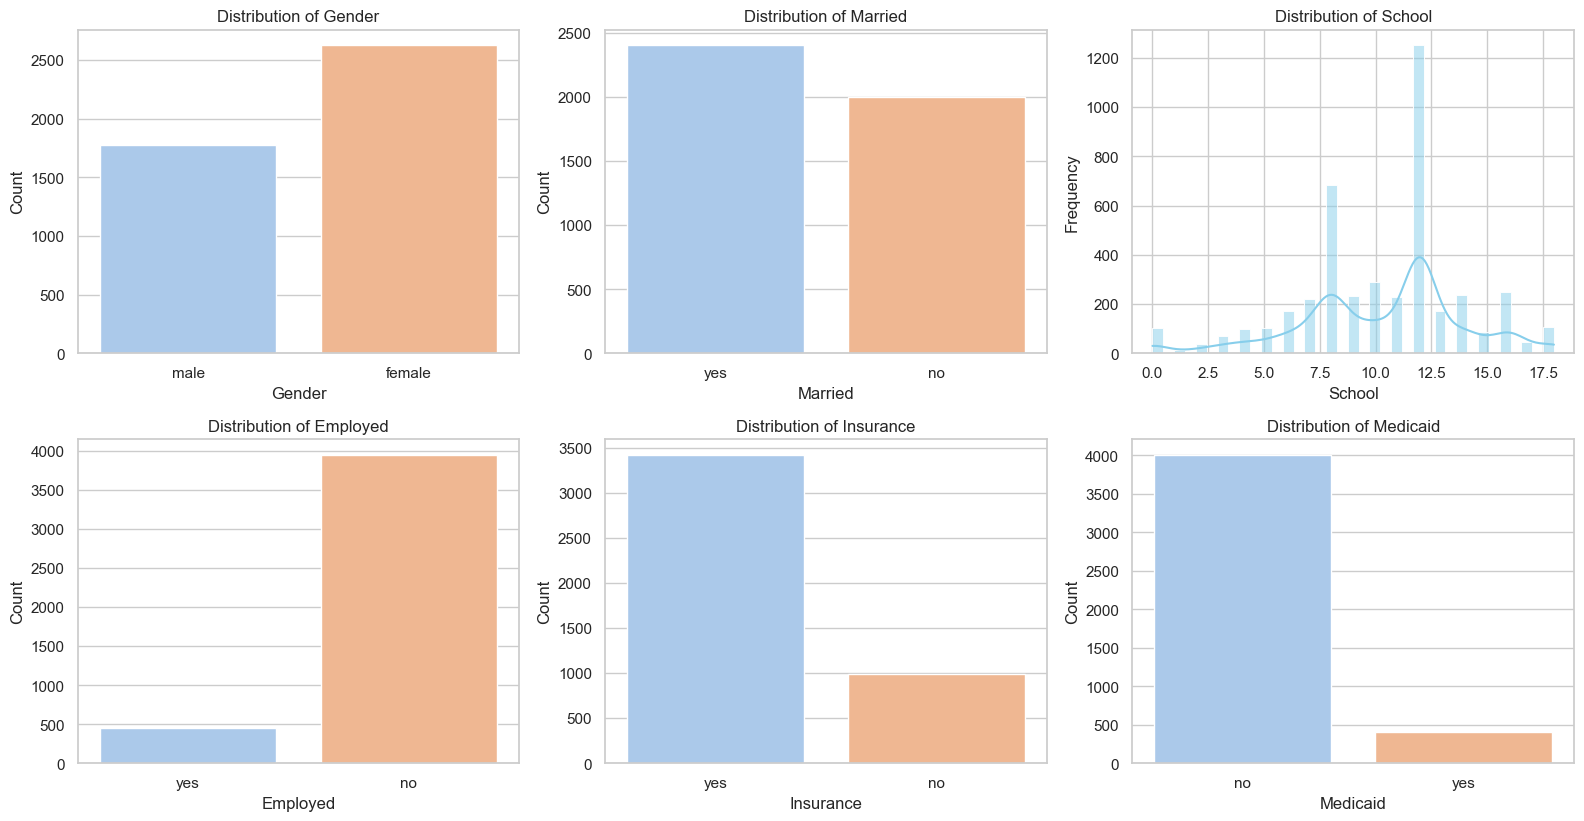

In [14]:
#Set up the visual theme
sns.set_theme(style="whitegrid")
# Features to plot
features = ['gender', 'married', 'school', 'employed', 'insurance', 'medicaid']
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()
# Plot each feature with fixed syntax
for i, feature in enumerate(features):
    ax = axes[i]
    if df[feature].dtype == 'object' or df[feature].nunique() < 10:
        sns.countplot(data=df, x=feature, hue=feature, ax=ax, palette="pastel")
        legend = ax.get_legend()
        if legend:
            legend.remove()  # Remove legend dupes
        ax.set_title(f'Distribution of {feature.capitalize()}')
        ax.set_xlabel(feature.capitalize())
        ax.set_ylabel('Count')
    else:
        sns.histplot(data=df, x=feature, kde=True, ax=ax, color="skyblue")
        ax.set_title(f'Distribution of {feature.capitalize()}')
        ax.set_xlabel(feature.capitalize())
        ax.set_ylabel('Frequency')
# Remove any extra subplots
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

C:\Users\prate\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


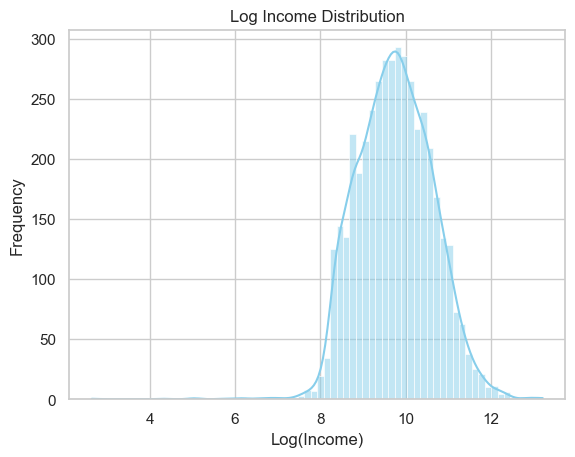

C:\Users\prate\AppData\Local\Temp\ipykernel_29936\353736752.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='health', y='log_income', palette="pastel")


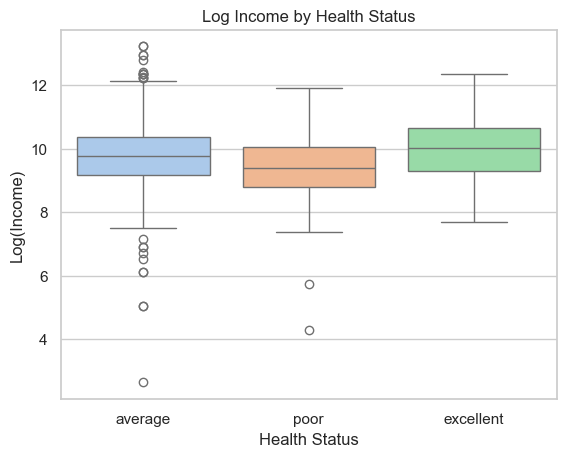

In [15]:
# concert df['income'] to log scale and visualize
df['log_income'] = np.log(df['income'].replace(0, np.nan))  # Replace 0 with NaN to avoid log(0)
sns.histplot(df['log_income'].dropna(), kde=True, color="skyblue")
plt.title('Log Income Distribution')
plt.xlabel('Log(Income)')
plt.ylabel('Frequency')
plt.show()
# Visualize the relationship between income and health
sns.boxplot(data=df, x='health', y='log_income', palette="pastel")
plt.title('Log Income by Health Status')
plt.xlabel('Health Status')
plt.ylabel('Log(Income)')
plt.show()


### Task 6: Explore and analyze the dataset to gain insights into how different factors relate to each other within the dataset. Group the data according to specific demographic and economic criteria below, and create a series of distribution tables by considering the instructions below:

- __Age and Gender Distribution__: Generate a table to view the number of individuals within each age group, separated by gender.

In [16]:
df['age'].describe()

count    4406.000000
mean       74.024058
std         6.334050
min        66.000000
25%        69.000000
50%        73.000000
75%        78.000000
max       109.000000
Name: age, dtype: float64

In [22]:
#age distribution by quantiles
age_quantiles = df['age'].quantile([0.25, 0.5, 0.75])
age_bins = [0, age_quantiles[0.25], age_quantiles[0.5], age_quantiles[0.75], df['age'].max()]
age_bins_labels = [f'{min(df["age"])}-{age_bins[1]}',
                  f'{age_bins[1]}-{age_bins[2]}',
                  f'{age_bins[2]}-{age_bins[3]}',
                  f'{age_bins[3]}+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_bins_labels)
#pivot table with age groups and gender
age_gender_pivot = df.pivot_table(index='age_group', columns='gender', values='visits', aggfunc='count').round(1)
age_gender_pivot

C:\Users\prate\AppData\Local\Temp\ipykernel_29936\3719792197.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_gender_pivot = df.pivot_table(index='age_group', columns='gender', values='visits', aggfunc='count').round(1)


gender,female,male
age_group,,
66-69.0,723,554
69.0-73.0,642,452
73.0-78.0,643,409
78.0+,620,363


- __Health Status by Gender__: Create a distribution table that categorizes individuals by their health status, differentiated by gender.

In [23]:
#health status by gender
df.pivot_table(index='health', columns='gender', values='visits', aggfunc='count').round(1)

gender,female,male
health,,
average,2093,1416
excellent,193,150
poor,342,212


- __Income Distribution by Gender__: Compile a table to examine the income distribution across genders.

In [26]:
#income distribution by gender
income_distribution_by_gender = df.groupby('gender')['income'].describe().round(1)
income_distribution_by_gender


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,2628.0,22493.4,27218.3,-10125.0,7392.8,14160.0,27805.5,548351.0
male,1778.0,29377.1,31573.1,-10125.0,12537.0,20573.5,35651.8,548351.0


- __Regional Income Distribution__: Prepare a table to display the income distribution across various regions.

In [27]:
#income distribution by region
income_distribution_by_region = df.groupby('region')['income'].describe().round(1)
income_distribution_by_region


,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
midwest,1157.0,25136.3,31078.4,0.0,10164.0,17875.0,31596.0,548351.0
northeast,837.0,26797.0,31962.3,0.0,10049.0,17413.0,33664.0,417596.0
other,1614.0,21662.8,23234.7,-10125.0,7833.0,14219.5,26984.8,360024.0
west,798.0,31165.0,33148.6,-8179.0,10102.5,20656.0,40703.2,242161.0


- __Age-wise Income Analysis__: Develop a table to analyze the relationship between age and income.

In [29]:
#income distribution by age group
#df['age_group'] is created above
income_distribution_by_age_group = df.groupby('age_group')['income'].describe().round(1)
income_distribution_by_age_group

C:\Users\prate\AppData\Local\Temp\ipykernel_29936\1502437188.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_distribution_by_age_group = df.groupby('age_group')['income'].describe().round(1)


,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
66-69.0,1277.0,27849.1,28075.4,-8179.0,11234.0,19936.0,35029.0,360024.0
69.0-73.0,1094.0,26142.0,28998.1,0.0,10104.2,17877.5,32675.2,548351.0
73.0-78.0,1052.0,24184.9,33731.8,-10125.0,8454.0,15596.5,28461.2,548351.0
78.0+,983.0,22115.9,25263.7,0.0,7108.0,13596.0,26987.5,230179.0


In [30]:
df.describe()

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income,log_income
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4385.000000
mean,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,74.024058,10.290286,25271.239446,9.751857
std,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,6.334050,3.738736,29246.480224,0.880683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,0.000000,-10125.000000,2.639057
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,69.000000,8.000000,9121.500000,9.128479
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,73.000000,11.000000,16981.500000,9.742556
75%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,78.000000,12.000000,31728.500000,10.367410
max,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,109.000000,18.000000,548351.000000,13.214671


### Task 7: Report your findings.

### Key Findings from Demographic and Income Distribution Analysis

- **Age and Gender Distribution**:  
    The dataset is divided into four age groups: 66–69, 69–73, 73–78, and 78+. In each group, there are more females than males, with the gender gap widening in older age brackets.

- **Income Distribution by Gender**:  
    - Males have a higher mean income (29,377) compared to females (22,493).
    - Both genders show a wide income range, with minimum values below zero (likely data entry or reporting errors) and maximums exceeding 500,000.
    - The median income is also higher for males (20,573.5) than females (14,160).

- **Regional Income Distribution**:  
    - The West region has the highest mean income (31,165), followed by Northeast (26,797), Midwest (25,136), and Other (21,662).
    - All regions show substantial income variability, with large standard deviations and high maximum values.
    - Negative or zero minimum incomes are present in all regions, indicating possible data quality issues.

- **Income by Age Group**:  
    - Mean income decreases with age:  
        - 66–69: 27,849  
        - 69–73: 26,142  
        - 73–78: 24,184  
        - 78+: 22,115
    - The youngest group (66–69) has the highest mean and median incomes, while the oldest (78+) has the lowest.
    - All age groups show large income ranges and standard deviations, suggesting significant economic diversity within each group.

- **General Observations**:  
    - There is a consistent gender gap in income, with males earning more on average.
    - Income tends to decrease with increasing age.
    - Regional differences are notable, with the West region standing out for higher average incomes.
    - The presence of negative and zero incomes suggests the need for further data cleaning or clarification on income reporting.

These findings highlight demographic disparities and regional variations in income among older adults in the dataset.